# Challenge 1

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def rolls(n):
    return [random.randint(1,6) for i in range(n)]

In [4]:
dice_rolls = rolls(10)

In [15]:
dice_df = pd.DataFrame({'rolls':dice_rolls})

In [16]:
dice_df

,rolls
0,1
1,5
2,5
3,4
4,2
5,3
6,6
7,2
8,3
9,3


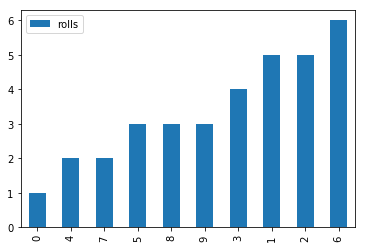

In [22]:
dice_df.sort_values(by='rolls').plot(kind='bar')

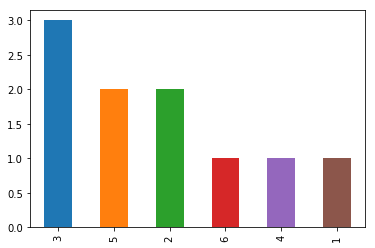

In [25]:
dice_df['rolls'].value_counts().plot(kind='bar')

The first plot shows a column for each value that has obtained for each individual dice roll. The x-value represents the index of the dice roll and the y-axis the obtained value. E.g. The value 5 has been obtained 2 times, so there are two columns with y=5.
In the second plot, the obtained values have been grouped and the frequency is shown instead. The x-axis represents the number of the dice obtained (from 1 to 6) and the y-axis the number of times that the number has been obtained.

# Challenge 2

In [26]:
def my_mean(dice_rolls):
    result = 0
    for roll in dice_rolls:
        result += roll
    return result/len(dice_rolls)

In [27]:
my_mean(dice_rolls)

3.4

In [96]:
def dist_mean(dice_rolls):
    dice_dict = {}
    for roll in dice_rolls:
        if roll not in dice_dict.keys():
            dice_dict[roll] = 1
        else:
            dice_dict[roll] += 1
    return sum([k*v for k,v in dice_dict.items()])/len(dice_rolls)

In [97]:
dist_mean(dice_rolls)

3.4

In [64]:
def my_median(dice_rolls):
    sorted_rolls = sorted(dice_rolls)
    rolls_len = len(dice_rolls)
    if rolls_len % 2 == 0:
        return sum(sorted_rolls[rolls_len//2-1:rolls_len//2+1])/2
    else:
        return sorted_rolls[rolls_len//2]

In [56]:
my_median(dice_rolls)

3.0

In [81]:
def quartiles(dice_rolls):
    sorted_rolls = sorted(dice_rolls)
    rolls_len = len(dice_rolls)
    if rolls_len % 2 == 0:
        q2 = sum(sorted_rolls[rolls_len//2-1:rolls_len//2+1])/2
        first_half = sorted_rolls[:rolls_len//2]
        first_half_len = len(first_half)
        q1 = first_half[first_half_len//2]
        second_half = sorted_rolls[rolls_len//2:]
        second_half_len = len(second_half)
        q3 = second_half[second_half_len//2] 
    else:
        q2 = sorted_rolls[rolls_len//2]
        first_half = sorted_rolls[:rolls_len//2]
        first_half_len = len(first_half)
        q1 = sum(first_half[first_half_len//2-1:first_half_len//2+1])/2 
        second_half = sorted_rolls[rolls_len//2:]
        second_half_len = len(second_half)
        q3 = sum(second_half[second_half_len//2-1:second_half_len//2+1])/2   
    return q1,q2,q3

In [82]:
quartiles(dice_rolls)

(2, 3.0, 5)

# Challenge 3

In [83]:
df_100rolls = pd.read_csv('roll_the_dice_hundred.csv')

In [92]:
df_100rolls.head()

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


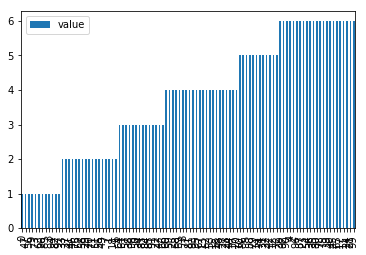

In [94]:
df_100rolls[['value']].sort_values(by='value').plot(kind='bar')

In [95]:
my_mean(df_100rolls['value'])

3.74

In [98]:
dist_mean(df_100rolls['value'])

3.74

In [140]:
freq_df = df_100rolls['value'].value_counts()
freq_df

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

In [141]:
freq_df = pd.DataFrame(data = freq_df).sort_index()

In [142]:
freq_df

,value
1,12
2,17
3,14
4,22
5,12
6,23


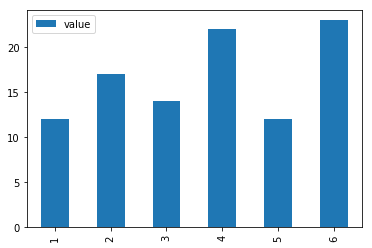

In [143]:
freq_df[['value']].plot(kind='bar')

With a large sample, since the probability of obtaining any value with a dice roll is 1/6, the frequency distribution should look uniform. However, here, since the number of rolls is not very big, the distribution looks far from uniform. 
The mean, which is 3.74, is in agreement with this graph, which shows a higher frequency of rolls at 4 and 6.

In [144]:
df_1000rolls = pd.read_csv('roll_the_dice_thousand.csv')

In [145]:
df_1000rolls.head()

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5


In [147]:
my_mean(df_1000rolls['value'])

3.447

In [150]:
freq_df = df_1000rolls['value'].value_counts()
freq_df

3    175
1    175
4    168
2    167
6    166
5    149
Name: value, dtype: int64

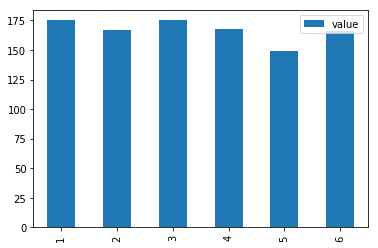

In [151]:
freq_df = pd.DataFrame(data = freq_df).sort_index()
freq_df[['value']].plot(kind='bar')

Here, the sample has significantly increased and now the distribution is much more closer to a uniform distribution.
Now, the mean (3.45) is much more closer to the expected value (3.5).

# Challenge 4

In [152]:
age1 = pd.read_csv('ages_population.csv')

In [153]:
age1.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


In [157]:
freq_df = age1['observation'].value_counts()
freq_df = pd.DataFrame(data = freq_df).sort_index().reset_index().rename(columns={'index': 'age'})
freq_df.head()

,age,observation
0,1.0,2
1,2.0,2
2,4.0,1
3,5.0,2
4,6.0,2


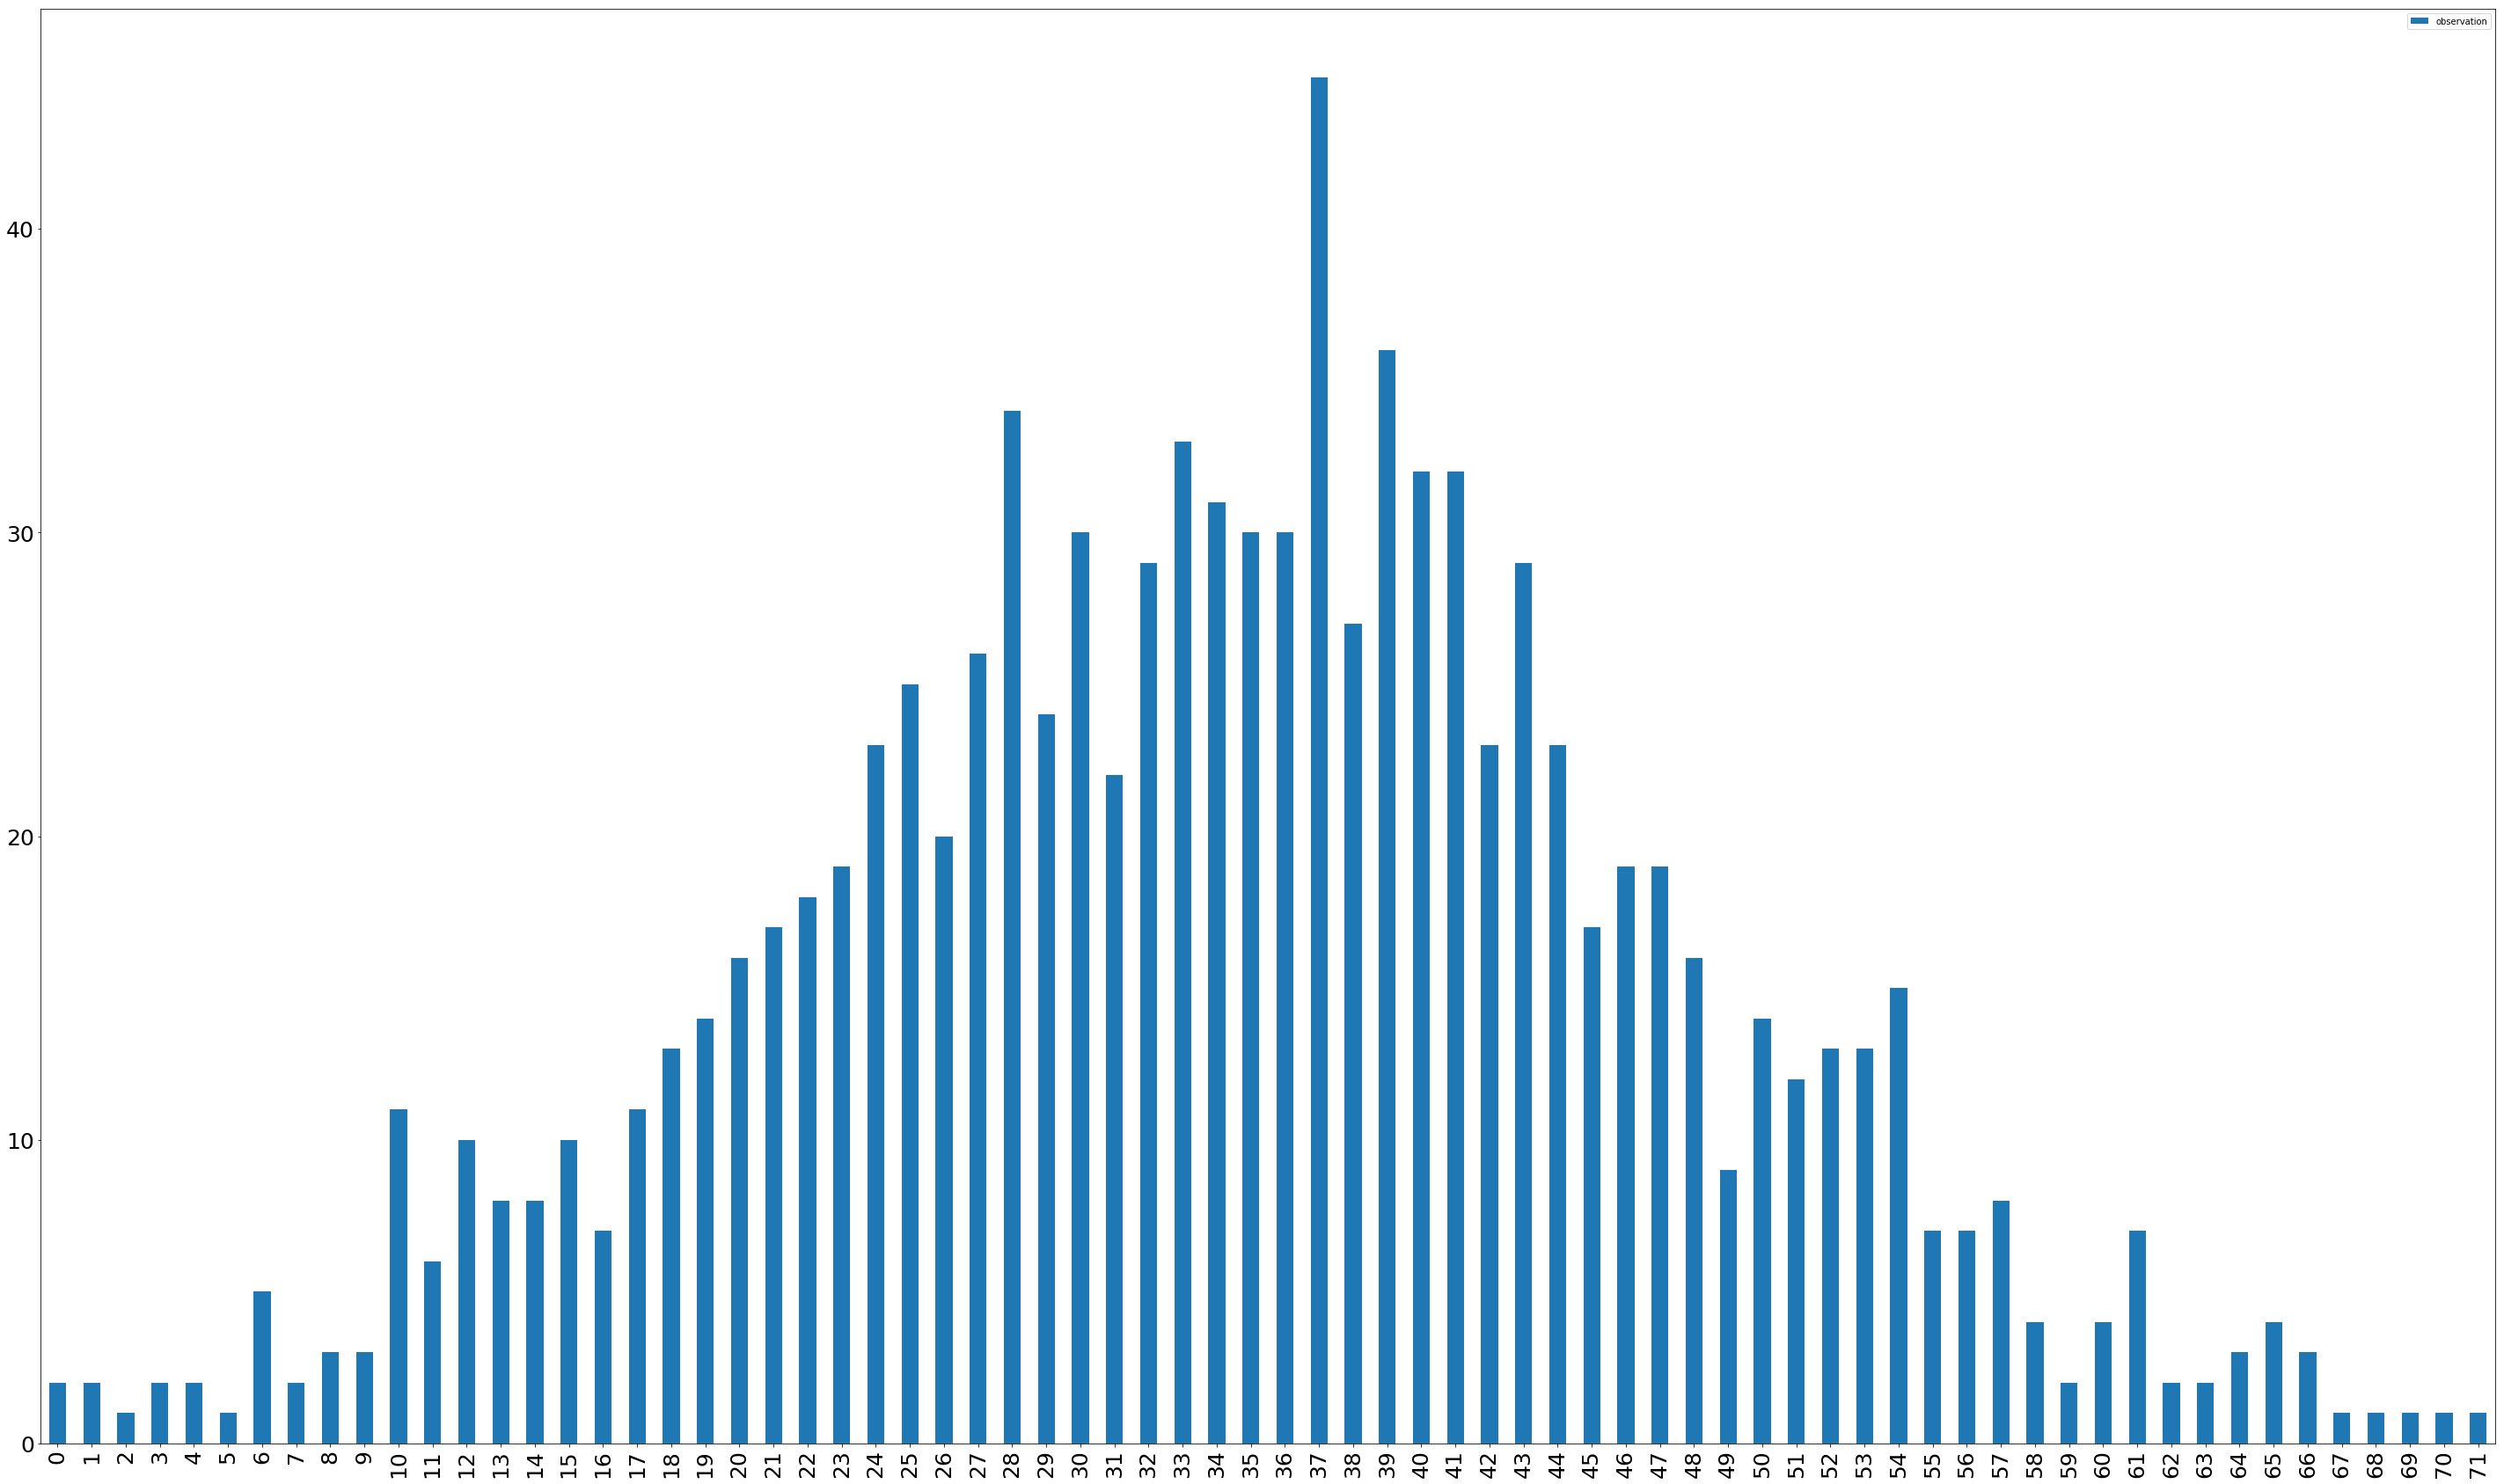

In [174]:
freq_df[['observation']].plot(kind='bar', figsize=(50,30), fontsize=25)

The mean seems to be around 35 years old.
The standard deviation seems to be about 10 years.

In [162]:
age1['observation'].mean()

36.56

In [163]:
age1['observation'].std()

12.81649962597677

The calculated values are fairly close to the ones defined with the eye.

In [2]:
age2 = pd.read_csv('ages_population2.csv')

In [168]:
age2

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
5,29.0
6,28.0
7,30.0
8,24.0
9,26.0


In [175]:
freq2_df = age2['observation'].value_counts()
freq2_df = pd.DataFrame(data = freq2_df).sort_index()
freq2_df.head()

,observation
19.0,3
20.0,13
21.0,17
22.0,35
23.0,41


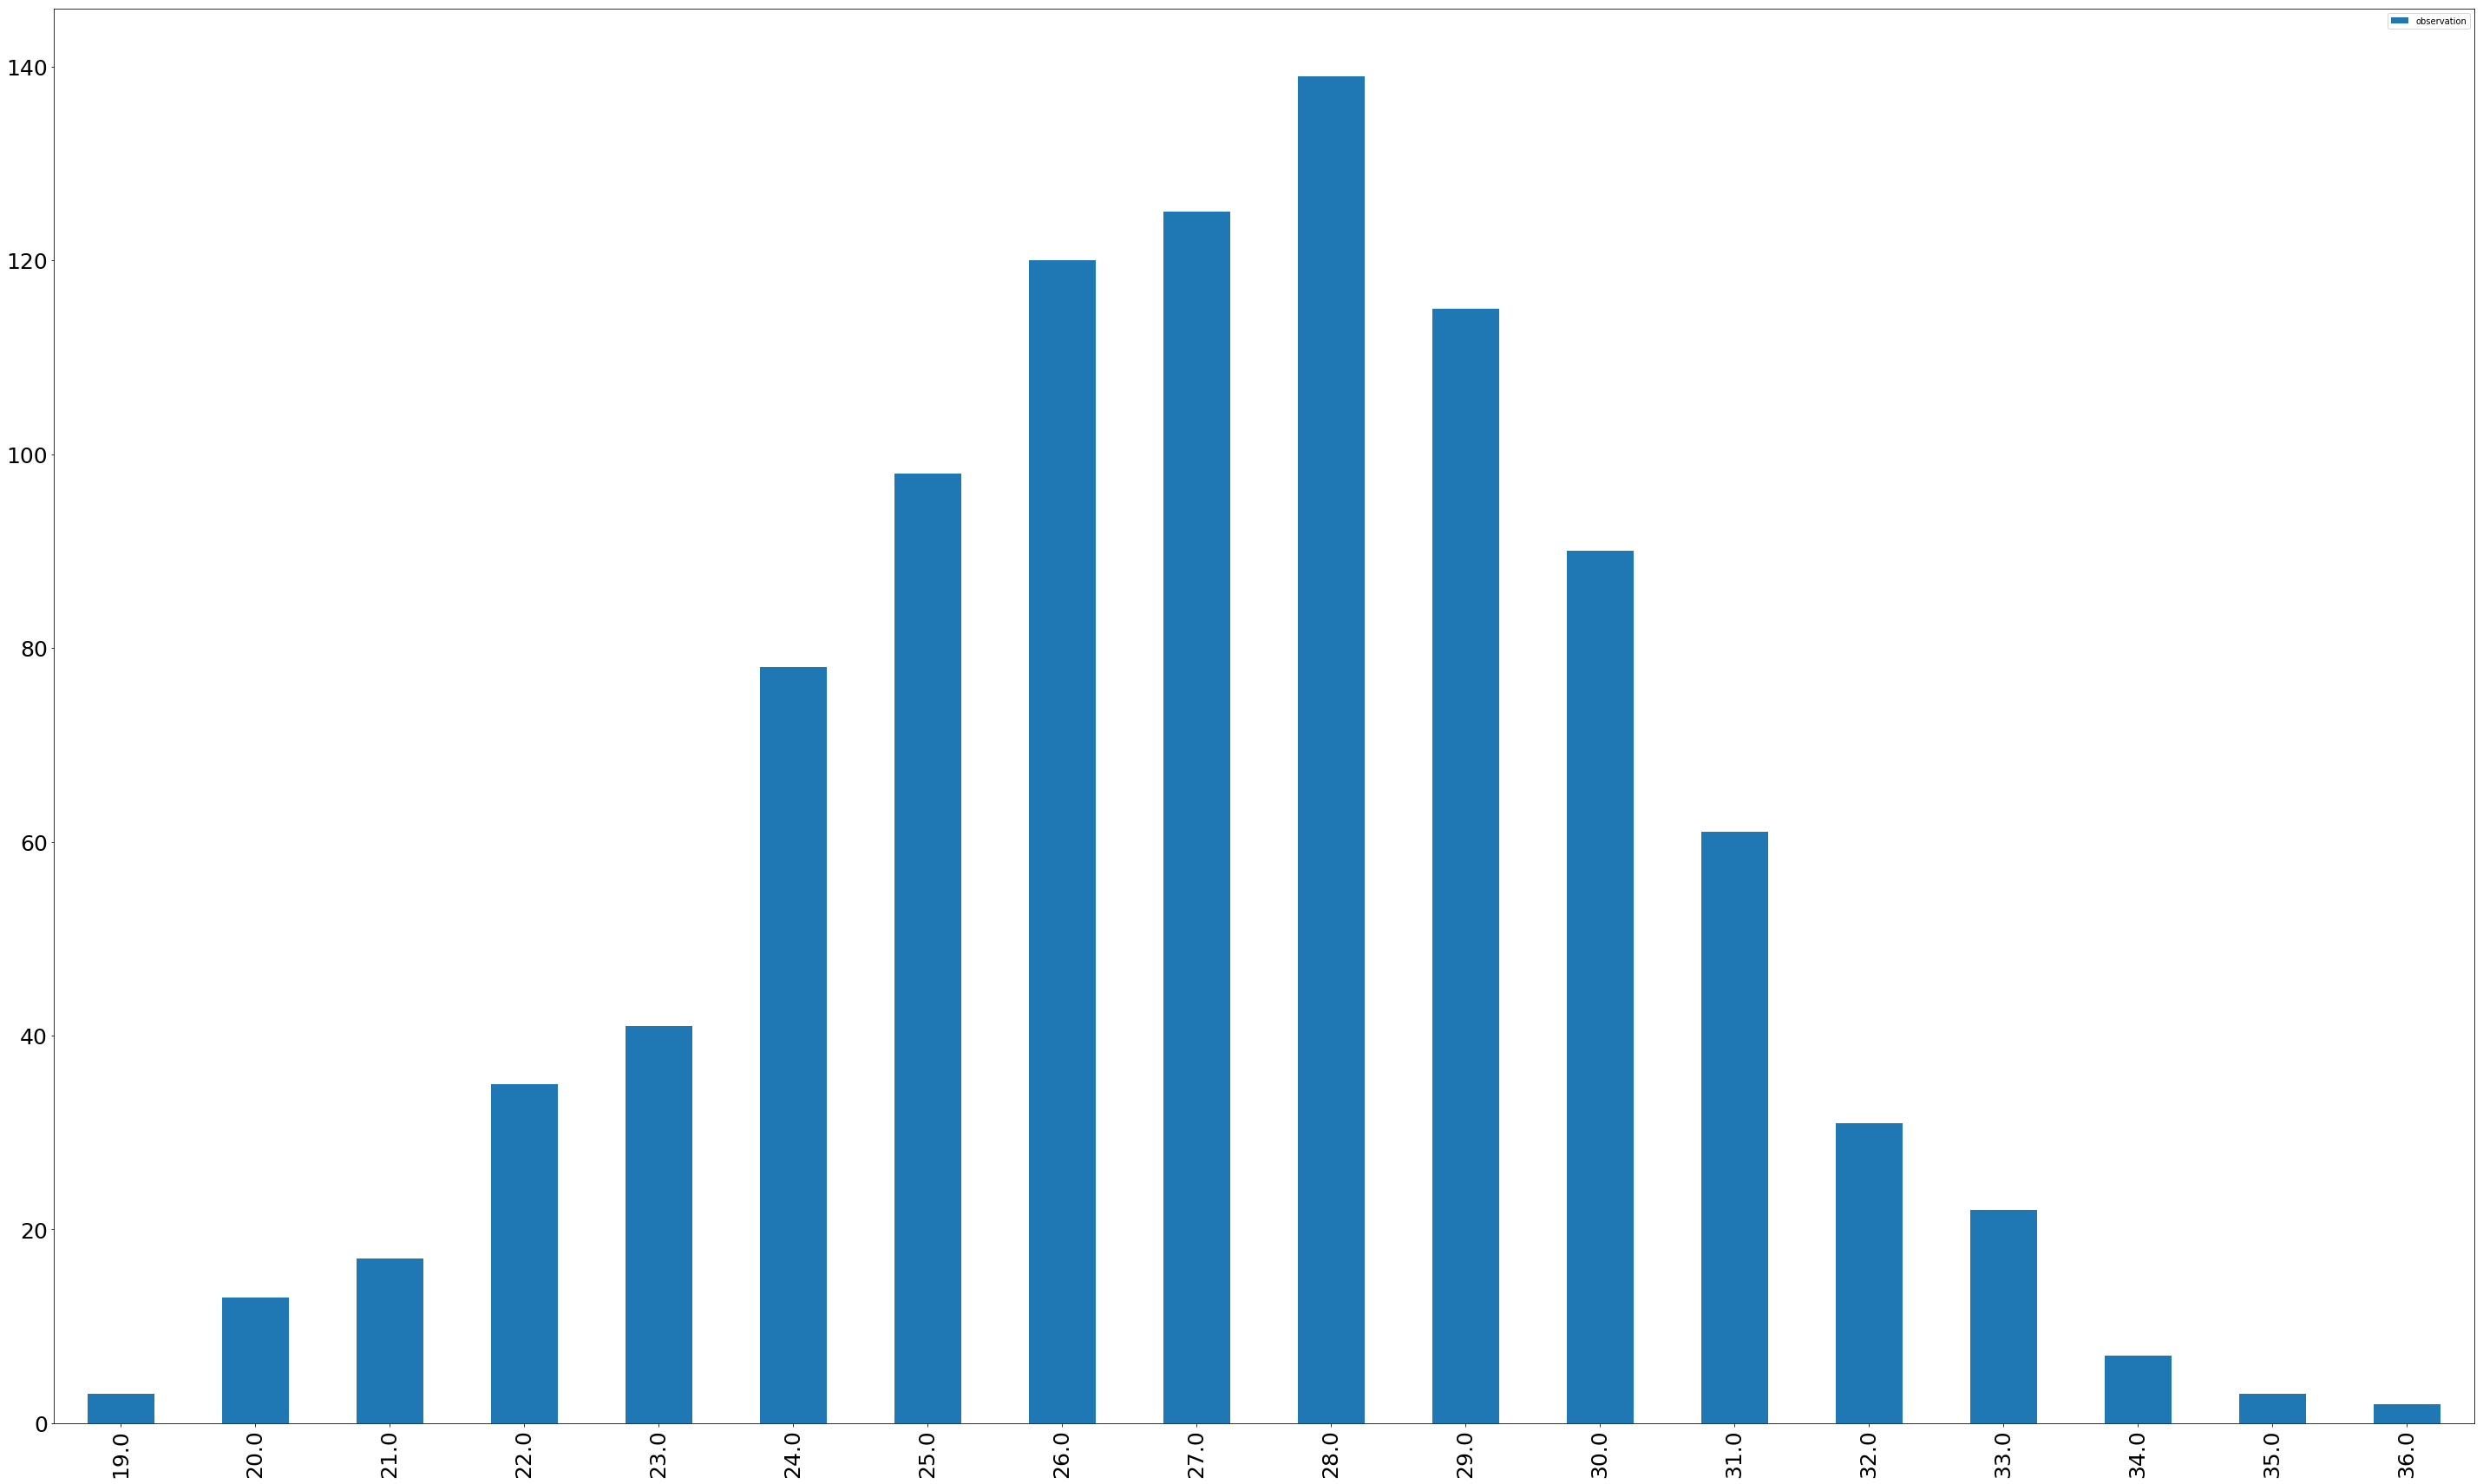

In [176]:
freq2_df[['observation']].plot(kind='bar', figsize=(50,30), fontsize=25)

The frequency distribution ressembles much more a normal distribution. There are a lot more values and in addition, the age range is much lower (19 to 36) than before (0 to 71).

In [3]:
age2['observation'].mean()

27.155

In [4]:
age2['observation'].std()

2.9698139326891835

The mean is lower than before since our range of ages is different.
The standard deviation is much lower because our range is much lower.

In [5]:
age3 = pd.read_csv('ages_population3.csv')

In [9]:
age3.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


In [7]:
freq3_df = age3['observation'].value_counts()
freq3_df = pd.DataFrame(data = freq3_df).sort_index()
freq3_df.head()

,observation
1.0,1
2.0,2
4.0,2
5.0,1
7.0,1


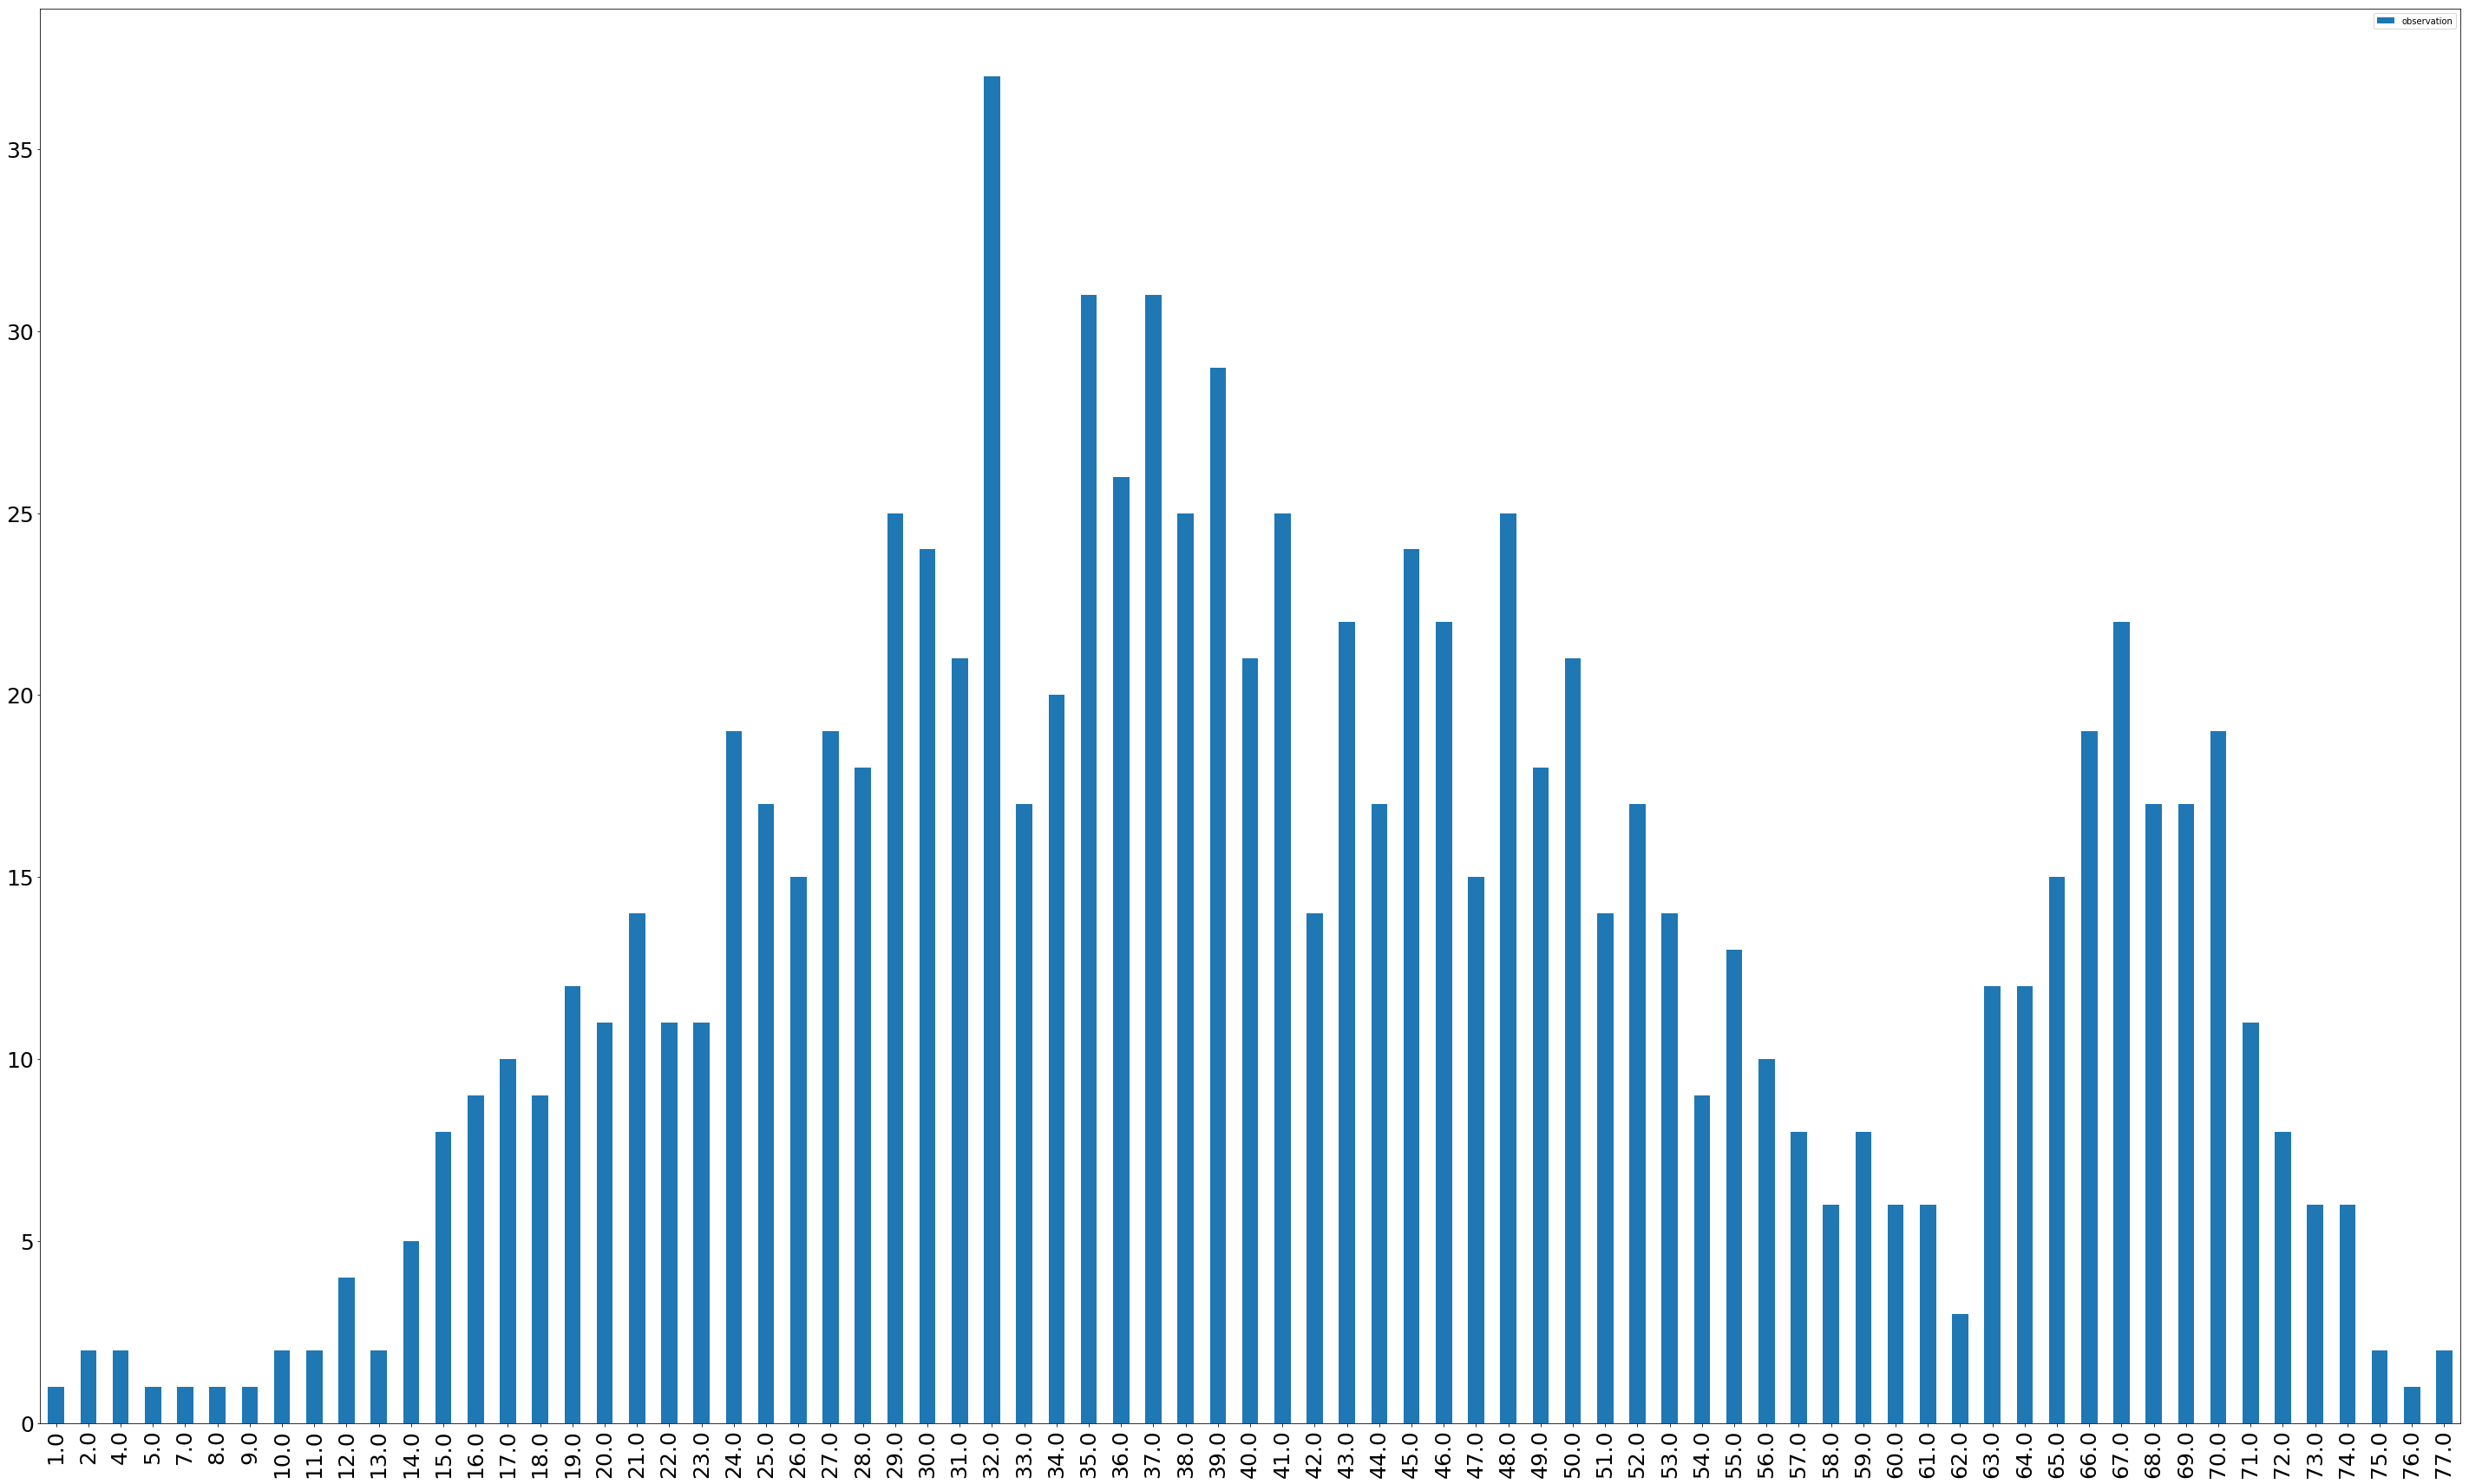

In [10]:
freq3_df[['observation']].plot(kind='bar', figsize=(50,30), fontsize=25)

In [11]:
age3['observation'].mean()

41.989

In [12]:
age3['observation'].std()

16.14470595986593

The distribution is now bimodal. There seem to be two curves, one centered around 35-40 and the other around 66-68 years old.
The mean falls a bit to the right of the middle of the first bell shaped distribution. This value is influenced by the high frequency of high values represented by the second bell shaped distribution. The standard deviation is much higher than before, given the high range of age values and the their dispersion along the range.

In [15]:
age3['observation'].quantile(0.5)

40.0

In [16]:
age3['observation'].quantile(0.25)

30.0

In [17]:
age3['observation'].quantile(0.75)

53.0

The difference between the first and third quartile indicate that half of the sample has an age between 30 and 53 years old. On the other hand, 25% of the sample presents less than 30 years, and the other 25% of the sample more than 53 years. These quartiles show that the data is quite spread. The mean is very similar to the mean, indicating there is a similar amount of data spread to the left and to the right of the mean.